In [691]:
# Algorithm
import sklearn
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ROC Curve
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt

# Data Cleansing 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("nfl_pbp.csv")

df #raw data

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,35,2010090900,NO,MIN,NO,home,MIN,MIN,30.0,2010-09-09,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,57,2010090900,NO,MIN,NO,home,MIN,NO,77.0,2010-09-09,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,81,2010090900,NO,MIN,NO,home,MIN,MIN,49.0,2010-09-09,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,109,2010090900,NO,MIN,NO,home,MIN,MIN,37.0,2010-09-09,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,135,2010090900,NO,MIN,NO,home,MIN,MIN,37.0,2010-09-09,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453792,3955,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
453793,3977,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
453794,3999,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,1,upheld,NaN,0.0,0.0,0.0,0.0
453795,4080,2019122915,SEA,SF,SF,away,SEA,SF,99.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [692]:
df = df[['game_date', 'posteam','yardline_100','quarter_seconds_remaining','half_seconds_remaining',
         'game_seconds_remaining','qtr','down','goal_to_go','ydstogo','play_type','score_differential',
         'shotgun','no_huddle','pass_attempt','rush_attempt', 'no_score_prob', 'opp_fg_prob',"drive"]]

df = df.dropna()

In [693]:
df 

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,pass_attempt,rush_attempt,no_score_prob,opp_fg_prob,drive
1,2010-09-09,NO,77.0,896.0,1796.0,3596.0,1,1.0,0.0,10,pass,0.0,1,0,1.0,0.0,0.001450,0.169434,1
2,2010-09-09,NO,49.0,861.0,1761.0,3561.0,1,1.0,0.0,10,pass,0.0,0,0,1.0,0.0,0.000871,0.084460,1
3,2010-09-09,NO,37.0,821.0,1721.0,3521.0,1,1.0,0.0,10,pass,0.0,1,0,1.0,0.0,0.000726,0.058726,1
4,2010-09-09,NO,37.0,816.0,1716.0,3516.0,1,2.0,0.0,10,run,0.0,0,0,0.0,1.0,0.000809,0.070085,1
5,2010-09-09,NO,29.0,784.0,1684.0,3484.0,1,3.0,0.0,2,pass,0.0,1,0,1.0,0.0,0.000773,0.054799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453791,2019-12-29,SEA,1.0,22.0,22.0,22.0,4,2.0,1.0,1,no_play,-5.0,0,0,0.0,0.0,0.134075,0.007926,16
453792,2019-12-29,SEA,5.0,22.0,22.0,22.0,4,2.0,1.0,5,pass,-5.0,1,0,1.0,0.0,0.174034,0.008484,16
453793,2019-12-29,SEA,5.0,15.0,15.0,15.0,4,3.0,1.0,5,pass,-5.0,1,0,1.0,0.0,0.197189,0.009679,16
453794,2019-12-29,SEA,5.0,12.0,12.0,12.0,4,4.0,1.0,5,pass,-5.0,1,0,1.0,0.0,0.206216,0.008679,16


In [694]:
train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & 
              ((df.play_type == 'run') | (df.play_type == 'pass'))]

test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & 
             ((df.play_type == 'run') | (df.play_type == 'pass'))]

In [695]:
train_df # play-by-play data from NFL Season 2010-2018

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,pass_attempt,rush_attempt,no_score_prob,opp_fg_prob,drive
1383,2010-09-12,NE,72.0,758.0,1658.0,3458.0,1,1.0,0.0,10,pass,0.0,1,0,1.0,0.0,0.002289,0.151487,2
1384,2010-09-12,NE,67.0,719.0,1619.0,3419.0,1,2.0,0.0,5,run,0.0,0,0,0.0,1.0,0.002535,0.149649,2
1385,2010-09-12,NE,59.0,687.0,1587.0,3387.0,1,1.0,0.0,10,pass,0.0,0,0,1.0,0.0,0.002265,0.110098,2
1386,2010-09-12,NE,14.0,634.0,1534.0,3334.0,1,1.0,0.0,10,run,0.0,0,0,0.0,1.0,0.000744,0.027169,2
1387,2010-09-12,NE,9.0,592.0,1492.0,3292.0,1,2.0,0.0,5,pass,0.0,0,0,1.0,0.0,0.000799,0.024348,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406389,2018-12-30,NE,27.0,263.0,263.0,263.0,4,1.0,0.0,10,run,27.0,0,0,0.0,1.0,0.152883,0.032641,19
406390,2018-12-30,NE,19.0,227.0,227.0,227.0,4,2.0,0.0,2,pass,27.0,0,0,1.0,0.0,0.143551,0.024161,19
406392,2018-12-30,NE,17.0,216.0,216.0,216.0,4,1.0,0.0,15,pass,27.0,1,0,1.0,0.0,0.136720,0.025032,19
406393,2018-12-30,NE,5.0,210.0,210.0,210.0,4,2.0,0.0,3,pass,27.0,0,0,1.0,0.0,0.102111,0.016090,19


In [696]:
test_df # play-by-play data from NFL Season 2019

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,pass_attempt,rush_attempt,no_score_prob,opp_fg_prob,drive
410598,2019-09-08,NE,80.0,896.0,1796.0,3596.0,1,1.0,0.0,10,run,0.0,0,0,0.0,1.0,0.001531,0.179722,1
410599,2019-09-08,NE,81.0,857.0,1757.0,3557.0,1,2.0,0.0,11,run,0.0,0,0,0.0,1.0,0.001831,0.211152,1
410600,2019-09-08,NE,74.0,823.0,1723.0,3523.0,1,3.0,0.0,4,run,0.0,1,0,0.0,1.0,0.001876,0.207425,1
410601,2019-09-08,NE,65.0,794.0,1694.0,3494.0,1,1.0,0.0,10,run,0.0,0,0,0.0,1.0,0.001702,0.128955,1
410602,2019-09-08,NE,62.0,763.0,1663.0,3463.0,1,2.0,0.0,7,run,0.0,0,0,0.0,1.0,0.001904,0.136962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451300,2019-12-29,NE,75.0,24.0,24.0,24.0,4,1.0,0.0,10,pass,-3.0,1,0,1.0,0.0,0.714363,0.040365,20
451301,2019-12-29,NE,75.0,20.0,20.0,20.0,4,2.0,0.0,10,pass,-3.0,1,0,1.0,0.0,0.731267,0.046040,20
451303,2019-12-29,NE,63.0,15.0,15.0,15.0,4,1.0,0.0,10,pass,-3.0,1,0,1.0,0.0,0.651410,0.034821,20
451304,2019-12-29,NE,63.0,9.0,9.0,9.0,4,2.0,0.0,10,pass,-3.0,1,0,1.0,0.0,0.675111,0.039445,20


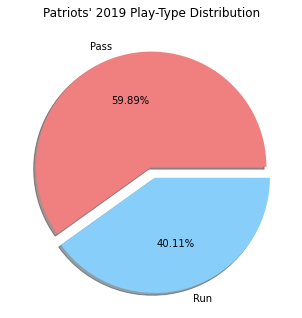

In [697]:
rel_freq = test_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(rel_freq, labels = ('Pass', 'Run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)
plt.title("Patriots' 2019 Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [698]:
train_df = train_df[(train_df.pass_attempt == 1)|(train_df.rush_attempt == 1)]
train_df['play_type'] = train_df.apply(lambda x: 1 if x.pass_attempt == 1 else 0, axis=1)
train_df.PlayType = train_df.play_type.fillna(0).astype(int)

train_features = train_df[['ydstogo','down','score_differential','no_score_prob','drive','game_seconds_remaining',
                           'opp_fg_prob','shotgun']]
#train_label = train_df['play_type']

X = train_features
y = train_df.PlayType

In [699]:
#Train_test_split
#split dataframes into random train and test subsets
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

#Algorithms used from Kaggle Article: NFL Analysis: Predicting Play Type
#Gradient Boosting 
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
gbc_predictions = gbc.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, gbc_predictions)
gbc_roc_auc = auc(false_positive_rate, true_positive_rate)

# K-Means Clustering
kmeans = KNeighborsClassifier(n_neighbors = 5)
kmeans.fit(train_X, train_y)
kmeans_predictions = kmeans.predict(val_X)

false_positive_rate, true_positive_rate, thresholds = roc_curve(val_y, kmeans_predictions)
kmeans_roc_auc = auc(false_positive_rate, true_positive_rate)

In [700]:
# Model Comparison 
results = pd.DataFrame({
    'Model': ['K-Means Clustering', 'Gradient Boosting Classifier'],
    'AUC': [kmeans_roc_auc, gbc_roc_auc]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('AUC')
result_df.head(2)

,Model
AUC,
0.769754,Gradient Boosting Classifier
0.561100,K-Means Clustering


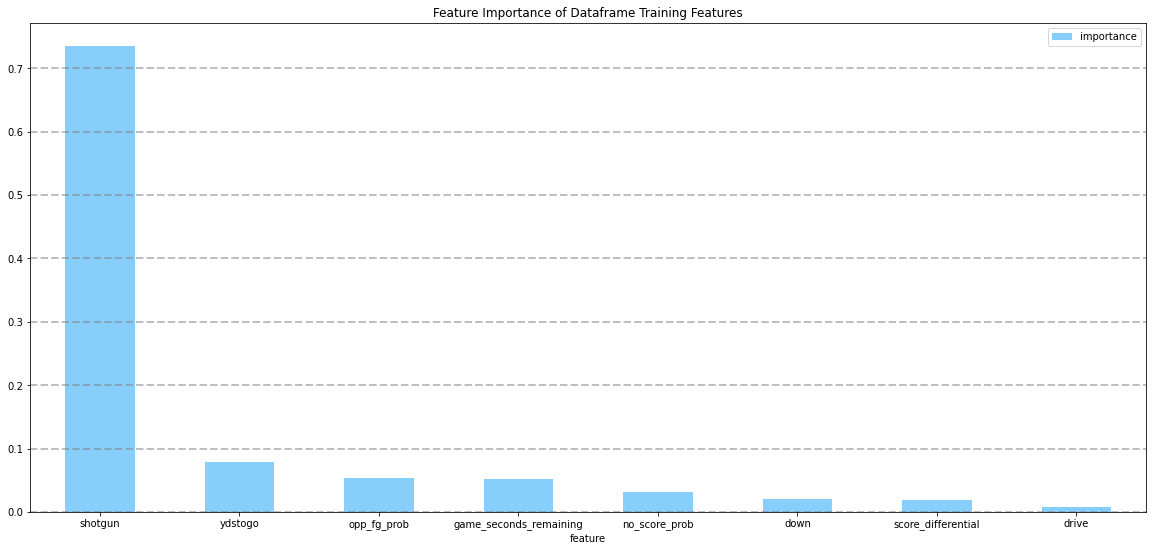

In [701]:
importances = pd.DataFrame({'feature':train_X.columns,'importance':np.round(gbc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(20,9),rot=0,color='lightskyblue')
plt.title("Feature Importance of Dataframe Training Features")
plt.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.5)

In [702]:
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state = 0)

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7692404799119683

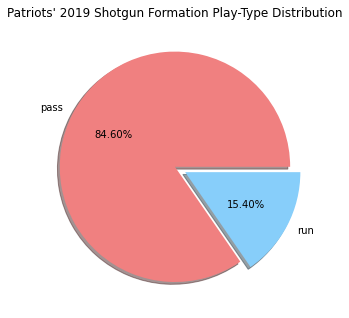

In [703]:
shotgun_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & 
                ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]

relative_frequency = shotgun_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightcoral', 'lightskyblue']
plt.pie(relative_frequency, labels = ('pass', 'run'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)

plt.title("Patriots' 2019 Shotgun Formation Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

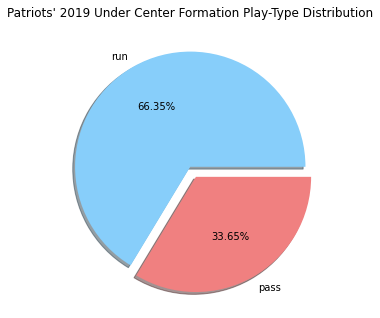

In [704]:
undercenter_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & 
                    ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 0)]

relative_frequency = undercenter_df['play_type'].value_counts()

explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']
plt.pie(relative_frequency, labels = ('run', 'pass'), autopct='%.2f%%', explode=explode, colors=colors, shadow=True)

plt.title("Patriots' 2019 Under Center Formation Play-Type Distribution")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [705]:
#apply accuracy model accross all NFL teams

df['posteam'].replace('STL','LA',inplace=True)
df['posteam'].replace('SD','LAC',inplace=True)
df['posteam'].replace('JAC','JAX',inplace=True)

len(df.posteam.unique())

results = pd.DataFrame(columns =['accuracy'])

for team in df.posteam.unique():
    
    train_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == team) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]
    test_df = df[(df.game_date.str.contains('2019')) & (df.posteam == team) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]
    
    train_df = train_df[(train_df.pass_attempt == 1)|(train_df.rush_attempt == 1)]
    train_df['play_type'] = train_df.apply(lambda x: 1 if x.pass_attempt == 1 else 0, axis=1)
    train_df.PlayType = train_df.play_type.fillna(0).astype(int)
    
    test_df = test_df[(test_df.pass_attempt == 1)|(test_df.rush_attempt == 1)]
    test_df['play_type'] = test_df.apply(lambda x: 1 if x.pass_attempt == 1 else 0, axis=1)
    test_df.PlayType = test_df.play_type.fillna(0).astype(int)

    train_features = train_df[['ydstogo','down','score_differential','no_score_prob','drive','game_seconds_remaining','opp_fg_prob','shotgun']]
    train_label = train_df['play_type']

    test_features = test_df[['ydstogo','down','score_differential','no_score_prob','drive','game_seconds_remaining','opp_fg_prob','shotgun']]
    test_label = test_df['play_type']
    
    X = train_features
    y = train_df.PlayType
    
    #Train_test_split
    train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

    #Gradient Boosting 
    gbc = GradientBoostingClassifier()
    gbc.fit(train_X, train_y)
    gbc_predictions = gbc.predict(test_features)

    accuracy = accuracy_score(test_label, gbc_predictions)
    results.loc[team] = [accuracy]

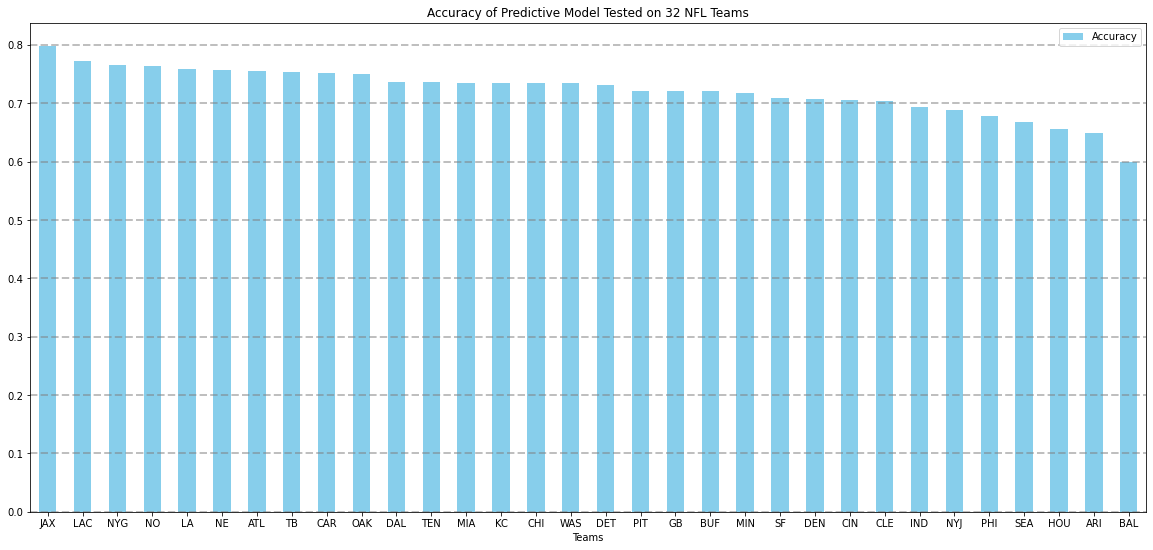

In [706]:
#results
accu = pd.DataFrame({'Teams':results.index,'Accuracy':results.accuracy})
accu = accu.sort_values('Accuracy',ascending=False).set_index('Teams')
accu.plot.bar(figsize=(20,9),rot=0,color='skyblue')

plt.title("Accuracy of Predictive Model Tested on 32 NFL Teams")
plt.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.5)